# Visualization

In [1]:
import os
from skyfield.api import load
from ground_path import ground_path
import pandas as pd
from plotting import plot_ground_path
import cartopy
from matplotlib import gridspec
import matplotlib.pyplot as plt
from datetime import datetime

### Load data

In [2]:
resource_url = 'http://celestrak.com/satcat/tle.php?CATNR=40299'

fname = 'tle_hodoyoshi_1.txt'
satellites = load.tle(resource_url, filename=fname, reload=False)

satellite = satellites['HODOYOSHI 1']
print(satellite)

EarthSatellite 'HODOYOSHI 1' number=40299 epoch=2018-10-24T12:03:08Z


In [3]:
# generate ground path
date_from = datetime(2018,8,1,0,0,0,0)
date_to = datetime(2018,8,2,0,0,0,0)
freq = 30 # generate data point every 30 seconds
df = ground_path(satellite, date_from, date_to, freq)
df.head()

,X,Y,Z,lat,lon,elevation,ascending,orbit
datetime,,,,,,,,
2018-08-01 00:00:00+00:00,554.203355,-3178.014692,6054.771852,62.118186,-29.613950,499.094947,True,0
2018-08-01 00:00:30+00:00,459.746660,-2995.194778,6154.700398,63.944699,-30.921147,499.336186,True,0
2018-08-01 00:01:00+00:00,364.781322,-2809.061221,6247.800731,65.759775,-32.392397,499.569012,True,0
2018-08-01 00:01:30+00:00,269.412421,-2619.820087,6333.969878,67.560777,-34.066235,499.791700,True,0
2018-08-01 00:02:00+00:00,173.745475,-2427.680857,6413.112555,69.344170,-35.993558,500.002625,True,0


### Plot

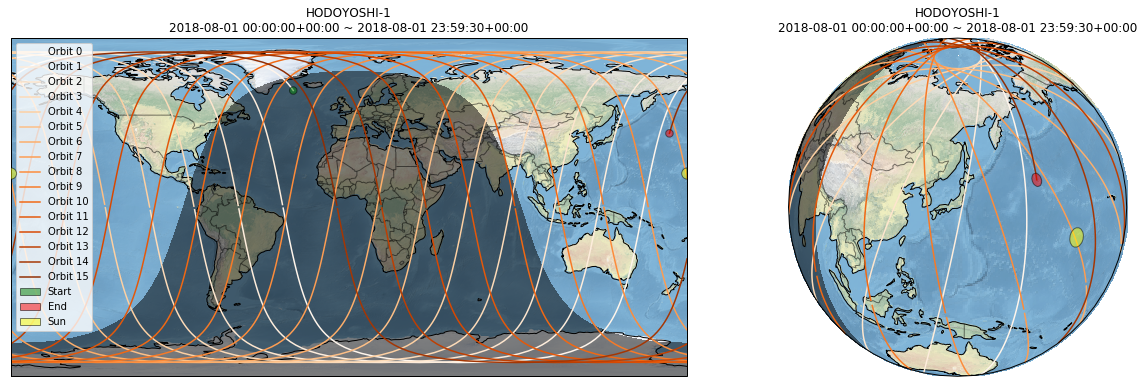

In [5]:
title = "HODOYOSHI-1\n{:} ~ {:}".format(df.index.min(), df.index.max())

fig = plt.figure(figsize=(20,10))

# map projection
projection0 = cartopy.crs.PlateCarree()
projection1 = cartopy.crs.NearsidePerspective(central_longitude=139.0, central_latitude=35.0)

# object transformation
transform = cartopy.crs.Geodetic()

gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 

ax0 = plt.subplot(gs[0], projection=projection0)
plot_ground_path(ax0, df, transform=transform, cmap='Oranges')
ax0.set_title(title)
ax0.legend(loc='upper left')

ax1 = plt.subplot(gs[1], projection=projection1)
plot_ground_path(ax1, df, transform=transform, cmap='Oranges')
ax1.set_title(title)

plt.savefig('ground_path_hodoyoshi_1.jpg')
plt.show()